In [1]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings ('ignore')

In [2]:
# Loading the dataset
recruitment = pd.read_csv ('Recruitment_Data_updated.csv')
recruitment.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,0.000707,2.976686,0.604739,Applied Online
1,-0.019452,2.989157,0.396567,NaN
2,-0.009998,2.993355,0.206242,Applied Online
3,-0.003004,1.989966,-0.475037,NaN
4,-0.025405,3.016559,0.345470,Campus


# Exploring the Dataset

In [4]:
# Display Dimensions of the dataset
recruitment.shape

(107354, 4)

In [5]:
# Check the datatypes of all the columns of the dataframe
recruitment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107354 entries, 0 to 107353
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   attrition           107354 non-null  float64
 1   performance_rating  107354 non-null  float64
 2   sales_quota_pct     107354 non-null  float64
 3   recruiting_source   57753 non-null   object 
dtypes: float64(3), object(1)
memory usage: 3.3+ MB


# Missing Value Treatment

In [7]:
# Display the count of null values in the data
recruitment.isnull().sum()

attrition                 0
performance_rating        0
sales_quota_pct           0
recruiting_source     49601
dtype: int64

Only the column 'recruiting_source' contains the missing value

In [9]:
# Calculate the percentage of missing values for the column 'recruiting_source'
Missing_percent = (recruitment['recruiting_source'].isnull().sum() / len(recruitment)) * 100
print ('Missing_percent_for_recruiting_source:', Missing_percent)

Missing_percent_for_recruiting_source: 46.20321552992902


As the missing values percentage for the recruiting source is 46.2%, we cannot drop the column or rows as it may lead to the significant information loss. It is better to impute the missing values.

In [11]:
recruitment['recruiting_source'].value_counts()

recruiting_source
Applied Online    30966
Campus            13453
Referral          10926
Search Firm        2408
Name: count, dtype: int64

As 'recruiting_source' is an important detail of this dataset, we cannot fill the missing values using mode. Thus, we fill the missing values with 'Unknown'

In [13]:
# Filling the missing values in the column 'recruitng_source'
recruitment['recruiting_source'].fillna ('Unknown', inplace = True)

In [14]:
# Once again checking the null values
recruitment.isnull().sum().sum()

0

# Univariate Analysis

### Univariate Analysis for Categorical column 'recruiting_source'

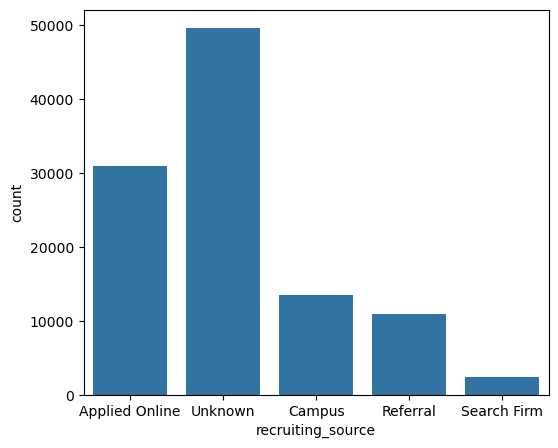

In [99]:
# Count plot for column 'recruitng_source'
plt.figure (figsize=(6,5))
sns.countplot(x='recruiting_source', data=recruitment)
plt.show()

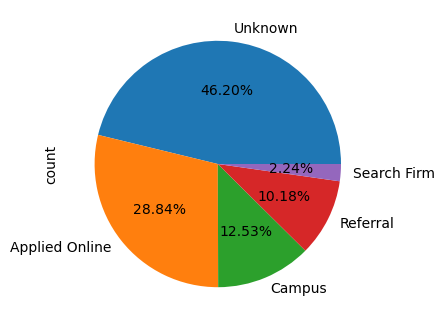

In [106]:
# Pie chart for column 'recruiting_source'
plt.figure (figsize = (5,4))
recruitment['recruiting_source'].value_counts().plot.pie(autopct="%1.2f%%")
plt.show()

### Univariate Analysis for Numerical columns

#### Central tendency for Numerical column
If the skewness is in the range of -0.5 to 0.5, we will use 'mean' as central tendency else 'median'

In [144]:
recruitment['attrition'].skew()

1.3991803834775889

In [150]:
print ('The median of attrition column is', recruitment['attrition'].median())

The median of attrition column is 0.0034839225


In [152]:
recruitment['performance_rating'].skew()

-0.04224422731040822

In [154]:
print ('The mean of performance_rating column is', recruitment['performance_rating'].mean())

The mean of performance_rating column is 2.895065546246691


In [156]:
recruitment['sales_quota_pct'].skew()

0.22417565344765786

In [160]:
print ('The mean of sales_quota_pct column is', recruitment['sales_quota_pct'].mean())

The mean of sales_quota_pct column is 1.0826062741271116


#### Distribution plot and Histogram for Numerical columns

In [119]:
Num_columns = ['attrition', 'performance_rating', 'sales_quota_pct']

Plot for the column attrition


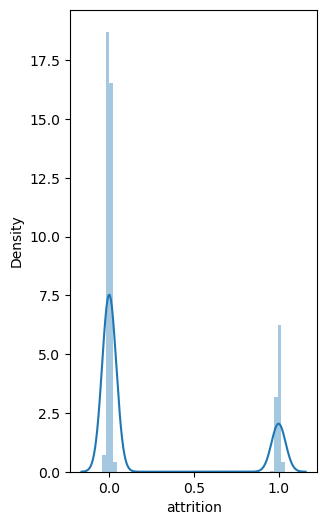

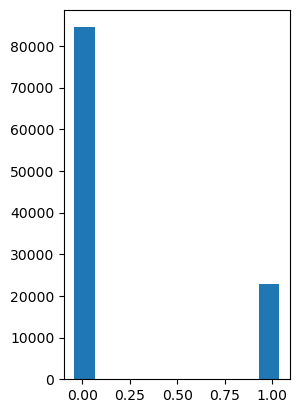

Plot for the column performance_rating


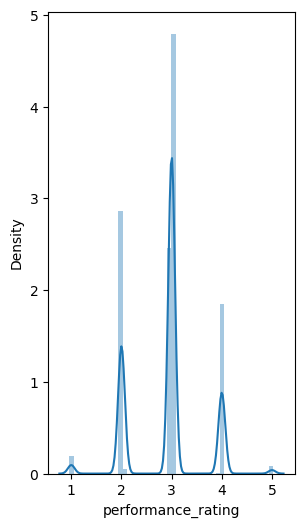

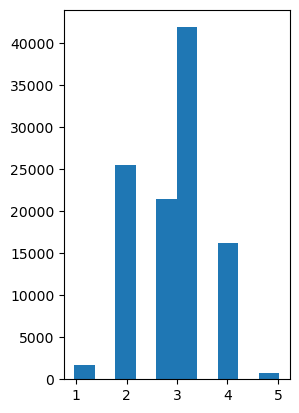

Plot for the column sales_quota_pct


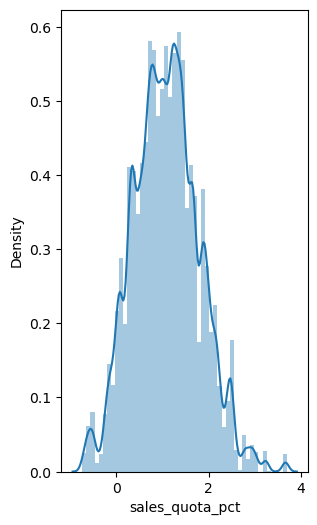

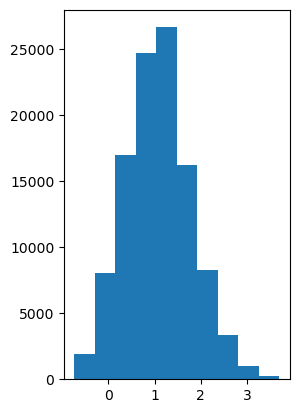

In [185]:
for columns in Num_columns:
    print ('Plot for the column ' + columns)

    plt.figure(figsize = (7,6))

    # Subplot for Distplot
    plt.subplot (1,2,1)
    sns.distplot(recruitment[columns])
    plt.show()
    
    # Subplot for Histogram
    plt.subplot (1,2,2)
    plt.hist(recruitment[columns])
    plt.show()

    print('=' * 140)

#### Analysis for Outliers

Boxplot for attrition


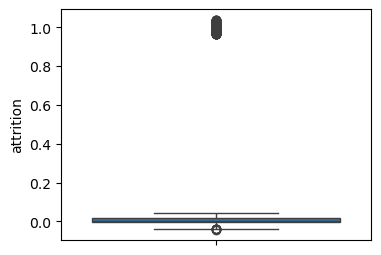

Boxplot for performance_rating


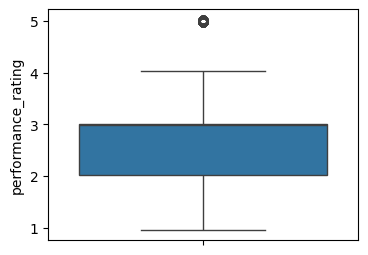

Boxplot for sales_quota_pct


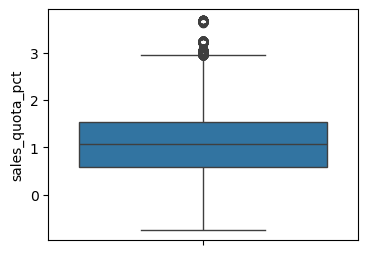

In [178]:
for columns in Num_columns:
    print ('Boxplot for', columns)
    plt.figure(figsize = (4,3))
    sns.boxplot (recruitment[columns])
    plt.show()

    print('=' * 140)

#### Insights
Attrition: The attrition column has extreme values around 1.

Performance_rating: The performance_rating has extreme values around 5.

Sales_quota_pct: The values above 3 are considered extreme values.

# TASK

In [188]:
# Print out the average Sales Number grouped by Recruiting Source
Performance_avg_per_source = recruitment.groupby('recruiting_source')['performance_rating'].mean()
Performance_avg_per_source

recruiting_source
Applied Online    2.891409
Campus            2.893206
Referral          2.906395
Search Firm       2.897311
Unknown           2.895248
Name: performance_rating, dtype: float64

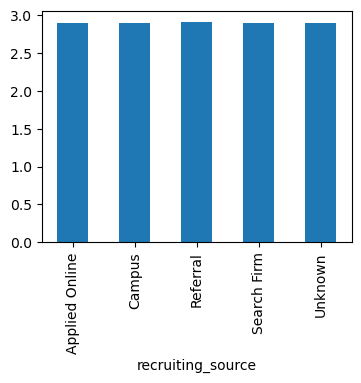

In [249]:
plt.figure (figsize = (4,3))
Performance_avg_per_source.plot (kind = 'bar')
plt.show()

In [203]:
# Print out the average Attrition Number grouped by Recruiting Source
attrition_avg_per_source = recruitment.groupby('recruiting_source')['attrition'].mean() # As attrition is moderately skewed
attrition_avg_per_source

recruiting_source
Applied Online    0.213370
Campus            0.215109
Referral          0.214920
Search Firm       0.208177
Unknown           0.212437
Name: attrition, dtype: float64

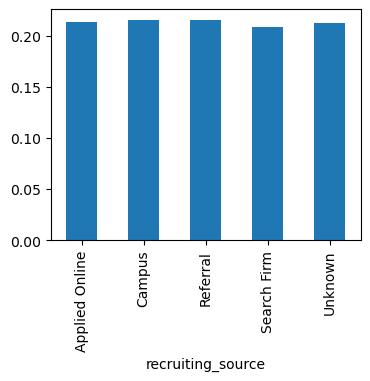

In [245]:
plt.figure (figsize = (4,3))
attrition_avg_per_source.plot (kind = 'bar')
plt.show()

By comparing the Recruiting source with performance_rating, we found that Referral has high rating whereas Applied Online has low rating.

By comparing the Recruiting source with attrition, we found that Unknown source has high attrtion whereas Search Firm has low rating.

As we are looking for sources that have high Sales numbers and low Attrition numbers, the Referral source seems to be the best source for Recruitment.

# Conclusion:
We successfully explored the dataset, identified the missing values, imputed the missing values, performed univariate analysis, analyzed outliers and performed task. By determining the average performance rating and average attrition number for different recruiting source, we found out that Refferal source to be the best source for Recruitment.